## Linear Regression Hypothesis

Given training data:

$$
\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dots, (x^{(m)}, y^{(m)})\}
$$

The linear regression model is:

$$
f_{w,b}(x^{(i)}) = w x^{(i)} + b
$$

where:
- w is the weight  
- b is the bias  
- m is the number of training examples


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Cost Function \( J(w,b) \)

The goal is to find w and b that minimizes the difference between predictions and true values. The standard cost function is Mean Squared Error (MSE) defined as:

$$
J(w,b) = \frac{1}{2m} \sum_{i=1}^{m}
\left( f_{w,b}(x^{(i)}) - y^{(i)} \right)^2
$$

Substituting the hypothesis:

$$
J(w,b) = \frac{1}{2m} \sum_{i=1}^{m}
\left( w x^{(i)} + b - y^{(i)} \right)^2
$$

We square the differences in order to penalize the large errors.

In [19]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    total_cost = cost / (2*m)
    return total_cost


## Gradients of the Cost Function

Our cost function has w and b as input. The derivative of a function measures how a function changes with respect to its input. 

The gradient generalizes this to multiple variables, showing the rate of change along each direction. It points in the direction of steepest increase, so moving opposite the gradient leads to the steepest decrease. Therefore we take partial derivatives along each input.

The partial derivatives of \( J(w,b) \) are:

### With respect to \( w \)

$$
\frac{\partial J(w,b)}{\partial w}
=
\frac{1}{m}
\sum_{i=1}^{m}
\left( w x^{(i)} + b - y^{(i)} \right)
x^{(i)}
$$

### With respect to \( b \)

$$
\frac{\partial J(w,b)}{\partial b}
=
\frac{1}{m}
\sum_{i=1}^{m}
\left( w x^{(i)} + b - y^{(i)} \right)
$$


In [20]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0.0
    dj_db = 0.0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])

    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db


## Gradient Descent Update Rule

Parameters are updated iteratively as:

$$
w := w - \alpha \frac{\partial J(w,b)}{\partial w}
$$

$$
b := b - \alpha \frac{\partial J(w,b)}{\partial b}
$$

where $\alpha$ is the learning rate.


In [52]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    w = w_in
    b = b_in
    j_list = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db
       
        cost = compute_cost(x, y, w, b)
        j_list.append(cost)
    return w, b, j_list


In [101]:
w_init = 0.0
b_init = 0.0
alpha = 0.02
iterations = 7000
x_train = np.array([2,3,4,5,6])
y_train = np.array([400,500,600,700,860])

### Model Initialization (Before Training)

At initialization, the parameters are set to \( w = 0 \) and \( b = 0 \).

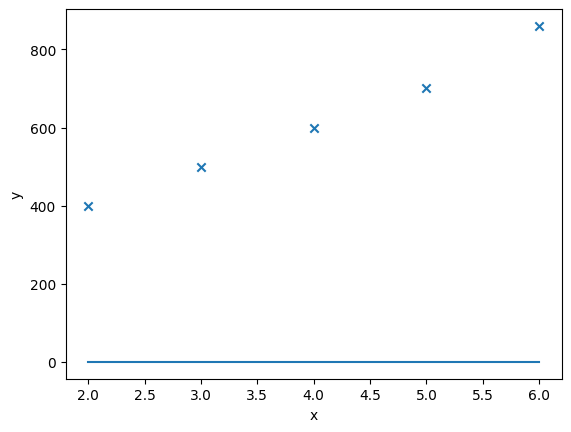

In [98]:
plt.scatter(x_train, y_train, marker='x')
plt.plot(x_train, w_init * x_train + b_init)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [102]:
w_final, b_final, j_list = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations)

print("Final w, b:", w_final, b_final)


Final w, b: 112.0000106725173 163.9999522561013


In [103]:
print(j_list)

[np.float64(78071.2736), np.float64(30894.218179840012), np.float64(12632.803998376461), np.float64(5562.610404050423), np.float64(2823.761323344069), np.float64(1761.2813891717174), np.float64(1347.616413973187), np.float64(1185.0724330463663), np.float64(1119.7300530880568), np.float64(1092.0178640072022), np.float64(1078.8799212622127), np.float64(1071.392847744492), np.float64(1066.102988922846), np.float64(1061.6736351731436), np.float64(1057.5873974645563), np.float64(1053.643988296215), np.float64(1049.7658480364119), np.float64(1045.9229165551412), np.float64(1042.1035176158575), np.float64(1038.3030902715248), np.float64(1034.5198275802006), np.float64(1030.7529886580012), np.float64(1027.002245392805), np.float64(1023.2674296023746), np.float64(1019.5484351763023), np.float64(1015.8451802013154), np.float64(1012.1575923019163), np.float64(1008.4856029660286), np.float64(1004.8291453481459), np.float64(1001.188153418348), np.float64(997.5625616322252), np.float64(993.952304802

### Model After Training

We found using gradient descend that, The cost function is minimum when \( w = 118.04 \) and \( b = 136.97\).

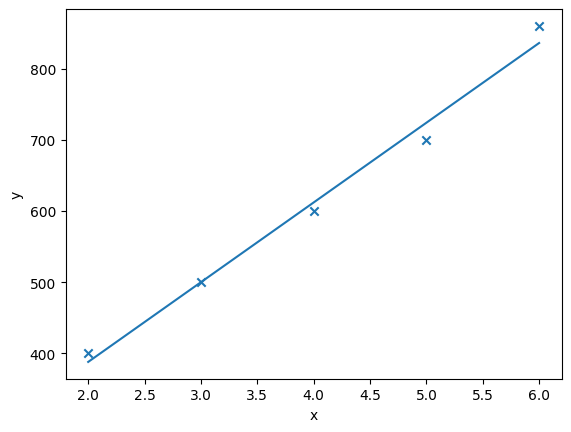

In [80]:
plt.scatter(x_train, y_train, marker='x')
plt.plot(x_train, w_final * x_train + b_final)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [104]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train)
print("Sklearn w, b:", model.coef_[0], model.intercept_)

Sklearn w, b: 112.00000000000003 163.9999999999999


In [105]:
import numpy as np
y_pred_yours = w_final * x_train + b_final
y_pred_sk = model.coef_[0] * x_train + model.intercept_

print("MSE yours:", np.mean((y_pred_yours - y_train)**2))
print("MSE sk   :", np.mean((y_pred_sk - y_train)**2))


MSE yours: 288.0000000002534
MSE sk   : 287.9999999999992
